In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

### Preparing training data

In [2]:
# X = np.mat("[2 3;1 3;5 9; 12 21;15 27;20 35;22 40]")
# Y = np.mat("[4 3 8 17 27 35 40]")
# X, Y
df = pd.read_csv("data/cars.csv", sep=";")

def x_normalization(x):
    return x - 1960

def y_normalization(x):
    return x / 1000

X = x_normalization(np.matrix(df.Year[0:40]).T)
Y = y_normalization(np.matrix(df.Bus[0:40]).T)

df[45:]

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
45,2011,16089528,8113111,389435,219906,2611104,728458,2527190,34116,NaN,1466208.0
46,2012,17033413,8648875,396119,235949,2794606,751650,2657722,33071,NaN,1515421.0
47,2013,17939447,9283923,421848,219885,2933050,755950,2722826,36148,NaN,1565817.0
48,2014,18828721,9857915,427264,211200,3062479,773728,2828466,40731,NaN,1626938.0
49,2015,19882069,10509258,446822,216566,3235304,802615,2938821,45138,NaN,1687545.0


### Plotting the training data

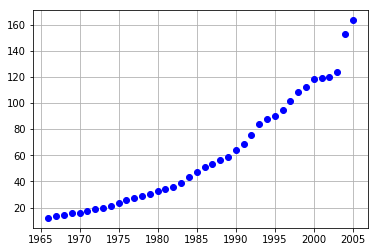

In [3]:
plt.plot(X+1960, Y, "bo")
plt.grid(True)

### Learning from the trainin data, creating a model
So far we have prepared necessary data and gain some insight about it. Now we can start to work on the essential problem: creating models and making predictions using it.

Lineare regresstion models can be made in two ways: one of them is to use normal equation form, the other is to use gradient descent as an iterative approach.

In [4]:
def learn_normal_equation(x, y):
    """
    creates a model and returns it.
    """
    x = np.hstack([np.matrix(np.ones(len(X))).T, x])
    w = (x.T*x).I * x.T * y
    return w

In [5]:
model = learn_normal_equation(X, Y)

### Plotting the best fit curve/model using the training data

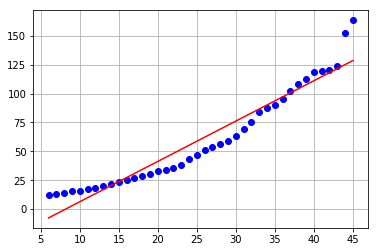

In [6]:
plt.plot(X, Y, "bo")
plt.plot(X, np.hstack([np.matrix(np.ones(len(X))).T, X]) * model, "r-")
plt.grid(True)
#plt.xlim(0, X[:,0][-1]+2)

### Testing model with test data

In [7]:
TX = np.matrix(df.Year[40:50]).T - 1960
TY = np.matrix(df.Bus[40:50]).T / 1000. # normalizad in million

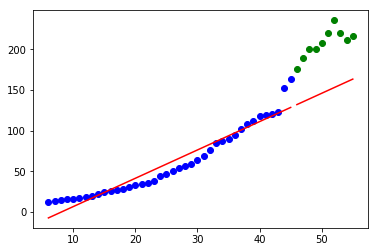

In [8]:
plt.plot(X, Y, "bo")
plt.plot(TX, TY, "go")
plt.plot(TX, np.hstack([np.matrix(np.ones(len(TX))).T, TX]) * model, "r-")
plt.plot(X, np.hstack([np.matrix(np.ones(len(X))).T, X]) * model, "r-")

# Linear Regression using gradient descent
Instead of using normal equation, here we will try to fit a model in an iterative way. Gradient descent is the method we are going to implement as an iterative approach. 

We use the same data prepared above.

### Plotting cost function
Cost funtion is the function that calculates the sum of squared error according a specific weight value. To plot the cost function, start with a random weight value and calculate the sum of error and repeat this operation by increasing or descreasing the weight value until some arbitrary weight value.

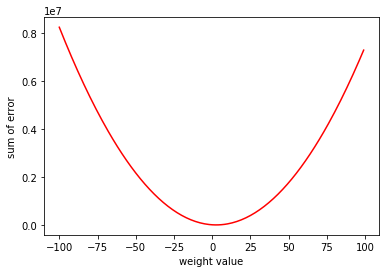

In [9]:
def plot_cost_function(x, y):
    N = len(x)
    history = []
    for i in range(-100, 100):
        w = i
        sum_error = np.sum(np.power(x * i - y, 2)) / N
        history.append([w, sum_error])

    history = np.array(history)
    plt.plot(history[:,0], history[:,1], "r")
    plt.xlabel("weight value")
    plt.ylabel("sum of error")
    plt.show()

plot_cost_function(X, Y)

As it can be seen, at a particular weight value the sum of error approaches to the global minimum, that is, the sum of error gets its lowest value as possible. Note that this function has only one minimum point which is also its global minimum. Our aim is to find the weight value that gives the lowest cost.

### Finding the weight by gradient descent

In [29]:
def learn_gradient_descent(x, y):
    N = len(x)
    dimention = x.shape[1]
    
    w = np.ones((dimention, 1))
    eta = 0.0001

    i = 0
    max_iteration = 1000000
    prev_error = np.infty
    error = 0
    history = []
    
    while True:
        estimation = x * w
        error = np.sum(np.power(estimation - y, 2)) / N
        gradient = x.T * (estimation - y) / N
        w = w - eta * gradient
        
        history.append([i, error])
        
        if prev_error * 0.9999 <= error or i == max_iteration:
            break

        prev_error = error
        i += 1
        
    return w, np.matrix(history)

### Debugging gradient descent
It is expected that the sum of error will **decrease** in each iterations. Decrement size will get smaller when it approaches to the minimum error. With the `eta` variable, we define how big step we will take in each iteration to the minimum error.

Debugging is important for gradient descent algorithms to check if it gets closer to the global minimum. For some reasons, for instance due to inappropriate eta value, gradient descent algorithms **may be too slow; or end up with divergence instead of convergence.**

Plotting error for each iterations may help you with debugging.

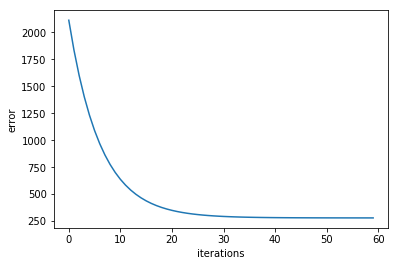

In [31]:
x = np.hstack([np.ones((len(X), 1)), X])
w, history = learn_gradient_descent(x, Y)

def plot_error(iterations, errors):
    plt.plot(iterations, errors)
    plt.xlabel("iterations")
    plt.ylabel("error")
    plt.show()

plot_error(history[:,0], history[:,1])

### Making predictions

Let's first plot the model on the same figure of the actual data. On this figure, we will visually see how the model fitted.

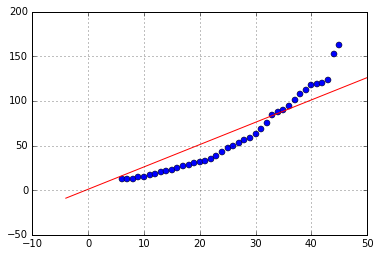

In [14]:
m = np.matrix(np.linspace(-4, 50, 300)).T
m = np.hstack([np.matrix(np.ones(len(m))).T, m])
plt.plot(x[:,1], Y, "o")
plt.plot(m[:,1], m * w, "r-")
plt.grid(True)
plt.show()

In [15]:
def predict(x, w):
    x = np.hstack([np.matrix(np.ones((len(x), 1))), x])
    return x * w

print(predict(x_normalization(np.mat(1980)), w))
print(predict(x_normalization(np.mat(2020)), w))

[[ 51.03482326]]
[[ 151.06806996]]


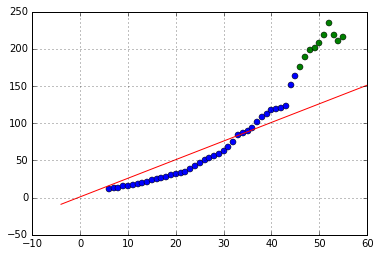

In [16]:
X_test = x_normalization(np.matrix(df.Year[40:]).T)
Y_test = y_normalization(np.matrix(df.Bus[40:]).T)
Y_predicted = predict(X_test, w)

m = np.matrix(np.linspace(-4, 60, 300)).T
m = np.hstack([np.matrix(np.ones(len(m))).T, m])
plt.plot(x[:,1], Y, "o")
plt.plot(m[:,1], m * w, "r-")
plt.plot(X_test, Y_test, "go")
plt.grid(True)
plt.show()